# LSTM Directional Models

In [104]:
import pandas as pd
import numpy as np

df_daily = pd.read_csv('daily_df_complete.csv')
df_daily.columns

Index(['Datetime', 'ETH_Price', 'ETH_Returns', 'ENA_Price', 'ENA_Returns',
       'claimed', 'total_claimed', 'Implied_APY', 'Stake', 'Total_Stake',
       'Target_ENA_Price', 'Target_ENA_Returns', 'Price_Change',
       'Target_Price_Change', 'Circulating Supply',
       'Liquid Circulating Supply', 'Liquid Circulating Supply Change',
       'Daily Funding Rate', 'Funding 7-Day MA', 'DFR_Change', 'DFR Lag: 1',
       'DFR Lag: 2', 'DFR Lag: 3', 'DFR Lag: 4', 'DFR Lag: 5', 'SMA_Returns'],
      dtype='object')

In [105]:
df_daily['Positive_Target_Return'] = np.where(df_daily['Target_ENA_Returns'] > 0, 1, 0)
df_daily


,Datetime,ETH_Price,ETH_Returns,ENA_Price,ENA_Returns,claimed,total_claimed,Implied_APY,Stake,Total_Stake,...,Daily Funding Rate,Funding 7-Day MA,DFR_Change,DFR Lag: 1,DFR Lag: 2,DFR Lag: 3,DFR Lag: 4,DFR Lag: 5,SMA_Returns,Positive_Target_Return
0,2024-05-11 00:00:00+00:00,2910.509033,0.000373,0.840159,-0.011604,3.627236e+05,4.944934e+08,0.006696,-2.004811e+06,2.253363e+08,...,0.022785,0.000433,-0.001392,-0.005823,0.005000,0.006652,-0.006246,0.000774,-0.012282,0
1,2024-05-12 00:00:00+00:00,2930.855225,0.007044,0.830356,-0.011520,2.704293e+05,4.947638e+08,0.012300,-1.057478e+06,2.242789e+08,...,0.021543,-0.000325,-0.001242,-0.001392,-0.005823,0.005000,0.006652,-0.006246,-0.023463,0
2,2024-05-13 00:00:00+00:00,2949.759277,0.006856,0.767258,-0.076842,1.156587e+05,4.948795e+08,0.001592,1.825138e+06,2.261040e+08,...,0.025829,0.000176,0.004286,-0.001242,-0.001392,-0.005823,0.005000,0.006652,-0.033322,0
3,2024-05-14 00:00:00+00:00,2881.265625,-0.023387,0.691822,-0.102181,1.958662e+05,4.950753e+08,0.001879,7.086870e+05,2.268127e+08,...,0.027264,0.001274,0.001435,0.004286,-0.001242,-0.001392,-0.005823,0.005000,-0.063514,1
4,2024-05-15 00:00:00+00:00,3036.393799,0.052786,0.735039,0.064832,5.960888e+04,4.951349e+08,-0.012467,4.035724e+05,2.272163e+08,...,0.027333,0.000333,0.000069,0.001435,0.004286,-0.001242,-0.001392,-0.005823,-0.038064,0
5,2024-05-16 00:00:00+00:00,2943.840820,-0.030770,0.673104,-0.085928,1.449581e+05,4.952799e+08,-0.016071,1.592878e+06,2.288091e+08,...,0.021854,-0.001164,-0.005479,0.000069,0.001435,0.004286,-0.001242,-0.001392,-0.041092,1
6,2024-05-17 00:00:00+00:00,3093.893066,0.050232,0.720388,0.070151,1.497829e+05,4.954297e+08,0.001679,-6.797277e+05,2.281294e+08,...,0.018188,-0.000856,-0.003666,-0.005479,0.000069,0.001435,0.004286,-0.001242,0.016352,1
7,2024-05-18 00:00:00+00:00,3122.875000,0.009405,0.755119,0.049340,7.033966e+04,4.955000e+08,0.065096,-2.496162e+05,2.278798e+08,...,0.018759,-0.000575,0.000571,-0.003666,-0.005479,0.000069,0.001435,0.004286,0.011188,0
8,2024-05-19 00:00:00+00:00,3072.527588,-0.016155,0.712269,-0.057921,1.747303e+05,4.956748e+08,0.045217,6.562378e+05,2.285360e+08,...,0.019664,-0.000268,0.000905,0.000571,-0.003666,-0.005479,0.000069,0.001435,0.020523,1
9,2024-05-20 00:00:00+00:00,3660.173340,0.180300,0.834891,0.162941,1.504486e+05,4.958252e+08,-0.002325,2.175002e+05,2.287535e+08,...,0.016231,-0.001371,-0.003433,0.000905,0.000571,-0.003666,-0.005479,0.000069,0.051453,1


In [36]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ensure predictor variables list does not contain duplicates
predictor_vars = ['ENA_Returns', 'claimed', 'Total_Stake', 'ETH_Returns', 'Implied_APY', 'Stake', 'Funding 7-Day MA', 'SMA_Returns']

# Check for missing values
if df_daily[predictor_vars].isnull().any().any():
    df_daily = df_daily.dropna(subset=predictor_vars)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_daily[predictor_vars])

# Apply PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# See how much variance is explained by the PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Optionally, merge the PCA components back into the original DataFrame
df_daily = df_daily.reset_index(drop=True)
df_daily_pca = pd.concat([df_daily, df_pca], axis=1)


Explained variance ratio: [0.31909496 0.17221317 0.14399125]


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Ensure predictor variables list does not contain duplicates
predictor_vars = ['ENA_Returns', 'claimed', 'Total_Stake', 'ETH_Returns', 'Implied_APY', 'Stake', 'Funding 7-Day MA', 'SMA_Returns']

# Check for missing values
if df_daily[predictor_vars].isnull().any().any():
    df_daily = df_daily.dropna(subset=predictor_vars)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_daily[predictor_vars])

# Create the target variable (1 if positive return, 0 if negative)
df_daily['Positive_Target_Return'] = (df_daily['Target_ENA_Returns'].shift(-1) > 0).astype(int)

# Drop the last row as it will have a NaN value in 'Positive_Target_Return' due to the shift
df_daily = df_daily.dropna()

# Define the input features and target variable
X = scaled_data
y = df_daily['Positive_Target_Return'].values

# Create sequences of 5 days for LSTM input
sequence_length = 5

# Reshape the data for LSTM input
X_reshaped = np.array([X[i-sequence_length:i] for i in range(sequence_length, len(X))])
y_reshaped = y[sequence_length:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.4, random_state=42)

# Define a function to build the model for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('units_1', min_value=32, max_value=128, step=16), return_sequences=True), input_shape=(sequence_length, len(predictor_vars))))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Bidirectional(LSTM(hp.Int('units_2', min_value=32, max_value=128, step=16))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    
    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp_learning_rate)
    else:
        optimizer = SGD(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_direction_prediction'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get all models and their corresponding validation accuracies
models = tuner.get_best_models(num_models=100)
accuracies = []
for model in models:
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

# Print all accuracies and the mean accuracy
print("Accuracies of all models:")
print(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

# Evaluate the best model
best_model = models[0]
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Best Model Test Accuracy: {accuracy:.2f}')

# Make predictions with the best model
predictions = (best_model.predict(X_test) > 0.5).astype(int)

# Calculate and print the percentage of correct predictions
correct_predictions = (predictions.flatten() == y_test).sum()
total_predictions = len(y_test)
accuracy_percentage = correct_predictions / total_predictions * 100

print(f'Percentage of correct direction predictions: {accuracy_percentage:.2f}%')


Reloading Tuner from hyperparameter_tuning/lstm_direction_prediction/tuner0.json


Exception ignored in: <function ScopedTFGraph.__del__ at 0x7f87fb9779d0>
Traceback (most recent call last):
  File "/home/lauri/anaconda3/lib/python3.9/site-packages/tensorflow/python/framework/c_api_util.py", line 54, in __del__
    def __del__(self):
KeyboardInterrupt: 


In [ ]:
np.array(accuracies).mean()

0.6009524005651474

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras_tuner import RandomSearch
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Ensure predictor variables list does not contain duplicates
predictor_vars = ['ENA_Returns', 'claimed', 'Total_Stake', 'ETH_Returns', 'Implied_APY', 'Stake', 'Funding 7-Day MA', 'SMA_Returns']

# Check for missing values
if df_daily[predictor_vars].isnull().any().any():
    df_daily = df_daily.dropna(subset=predictor_vars)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_daily[predictor_vars])

# Apply PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# See how much variance is explained by the PCA
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Optionally, merge the PCA components back into the original DataFrame
df_daily = df_daily.reset_index(drop=True)
df_daily_pca = pd.concat([df_daily, df_pca], axis=1)

# Create the target variable (1 if positive return, 0 if negative)
df_daily_pca['Positive_Target_Return'] = (df_daily_pca['Target_ENA_Returns'].shift(-1) > 0).astype(int)

# Drop the last row as it will have a NaN value in 'Positive_Target_Return' due to the shift
df_daily_pca = df_daily_pca.dropna()

# Define the input features and target variable using PCA components
X = df_daily_pca[['PCA1', 'PCA2', 'PCA3']].values
y = df_daily_pca['Positive_Target_Return'].values

# Create sequences of 5 days for LSTM input
sequence_length = 5

# Reshape the data for LSTM input
X_reshaped = np.array([X[i-sequence_length:i] for i in range(sequence_length, len(X))])
y_reshaped = y[sequence_length:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.4, random_state=42)

# Define a function to build the model for Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(hp.Int('units_1', min_value=32, max_value=128, step=16), return_sequences=True), input_shape=(sequence_length, 3)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Bidirectional(LSTM(hp.Int('units_2', min_value=32, max_value=128, step=16))))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    
    if hp_optimizer == 'adam':
        optimizer = Adam(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=hp_learning_rate)
    else:
        optimizer = SGD(learning_rate=hp_learning_rate)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='lstm_pca_direction_prediction'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get all models and their corresponding validation accuracies
models = tuner.get_best_models(num_models=100)
accuracies = []
for model in models:
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# Calculate mean accuracy
mean_accuracy = np.mean(accuracies)

# Print all accuracies and the mean accuracy
print("Accuracies of all models:")
print(accuracies)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

# Evaluate the best model
best_model = models[0]
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Best Model Test Accuracy: {accuracy:.2f}')

# Make predictions with the best model
predictions = (best_model.predict(X_test) > 0.5).astype(int)

# Calculate and print the percentage of correct predictions
correct_predictions = (predictions.flatten() == y_test).sum()
total_predictions = len(y_test)
accuracy_percentage = correct_predictions / total_predictions * 100

print(f'Percentage of correct direction predictions: {accuracy_percentage:.2f}%')


Trial 100 Complete [00h 00m 07s]
val_accuracy: 0.4285714328289032

Best val_accuracy So Far: 0.7142857313156128
Total elapsed time: 00h 12m 14s
Accuracies of all models:
[0.7142857313156128, 0.7142857313156128, 0.7142857313156128, 0.7142857313156128, 0.7142857313156128, 0.7142857313156128, 0.7142857313156128, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476417541504, 0.6190476

In [ ]:
np.array(accuracies).mean()

0.5861904948949814

In [120]:
import numpy as np
import pandas as pd

ena_1h = pd.read_csv('ena_1h_data.csv')
ena_1h = ena_1h.dropna()

# Assuming 'ena_1h_data.csv' is already loaded with 'ENA_Price' as one of the columns
ena_1h['Log Returns'] = np.log(ena_1h['ENA_Price'] / ena_1h['ENA_Price'].shift(1))
ena_1h.dropna(inplace=True)  # Remove any NaNs that appear from the log return calculation

# Calculate squared log returns
ena_1h['Squared Returns'] = ena_1h['Log Returns']**2

# Group by date if the date is in datetime format and sum the squared returns for each day
ena_1h['Datetime'] = pd.to_datetime(ena_1h['Datetime'])  # Ensure 'Date' is in datetime format
daily_volatility = ena_1h.groupby(ena_1h['Datetime'].dt.date)['Squared Returns'].sum()

# Calculate the square root of summed squared returns to get daily volatility
daily_volatility = np.sqrt(daily_volatility)

# Review the daily volatility
print(daily_volatility)

# Make index to datetime
import pandas as pd

# Convert index to datetime with nanosecond precision and UTC timezone
daily_volatility.index = pd.to_datetime(daily_volatility.index, unit='ns', utc=True)

# Review the updated index
print(daily_volatility)


Datetime
2024-05-10    0.067923
2024-05-11    0.025994
2024-05-12    0.020866
2024-05-13    0.069690
2024-05-14    0.048694
2024-05-15    0.068037
2024-05-16    0.061004
2024-05-17    0.070565
2024-05-18    0.067234
2024-05-19    0.033806
2024-05-20    0.105457
2024-05-21    0.092691
2024-05-22    0.071440
2024-05-23    0.048369
2024-05-24    0.081518
2024-05-25    0.072089
2024-05-26    0.051644
2024-05-27    0.050618
2024-05-28    0.055312
2024-05-29    0.036639
2024-05-30    0.047123
2024-05-31    0.046965
2024-06-01    0.041919
2024-06-02    0.042677
2024-06-03    0.095531
2024-06-04    0.065447
2024-06-05    0.038150
2024-06-06    0.022402
2024-06-07    0.051865
2024-06-08    0.037418
2024-06-09    0.029744
2024-06-10    0.058732
2024-06-11    0.057832
2024-06-12    0.071091
2024-06-13    0.052562
2024-06-14    0.059426
2024-06-15    0.041804
2024-06-16    0.029955
2024-06-17    0.071521
2024-06-18    0.130164
2024-06-19    0.073788
2024-06-20    0.067752
2024-06-21    0.046752
20

In [122]:
df_daily.Datetime = pd.to_datetime(df_daily.Datetime)
df_daily = df_daily.merge(daily_volatility, on='Datetime', how='left')

In [128]:
df_daily['Log Returns'] = np.log(df_daily['ENA_Price'] / df_daily['ENA_Price'].shift(1))

In [129]:
def rolling_garch_forecast(data, test_size, garch_type='GARCH', p=1, o=0, q=1):
    rolling_predictions = []
    
    for i in range(test_size):
        train = data[:-(test_size-i)]
        if garch_type == 'GARCH':
            model = arch_model(train, p=p, q=q)
        elif garch_type == 'GJR-GARCH':
            model = arch_model(train, p=p, o=1, q=q)
        elif garch_type == 'EGARCH':
            model = arch_model(train, p=p, o=o, q=q, vol='EGARCH')
        elif garch_type == 'FIGARCH':
            model = arch_model(train, p=p, o=o, q=q, vol='FIGARCH')
        else:
            raise ValueError("Unsupported GARCH model type")
        
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(pred.variance.values[-1,:][0])
    
    rolling_predictions = pd.Series(rolling_predictions, index=data.index[-test_size:])
    return np.sqrt(rolling_predictions)


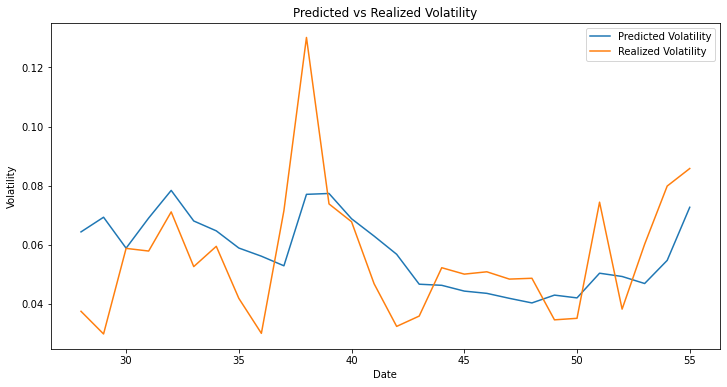

Mean Squared Error: 0.0003535550756705587
R-squared: 0.2167906794222103
Mean Absolute Percentage Error: 30.586514390923735 %


In [197]:
df_daily['Log Returns'] = np.log(df_daily['ENA_Price'] / df_daily['ENA_Price'].shift(1))

# Build GJR GARCH model
from arch import arch_model
import numpy as np

# Define the test size, for example, use the last 252 trading days (approximately one trading year)
test_size = int(0.5 * len(df_daily))

# Use your function to run the rolling GJR-GARCH forecast
predicted_volatility = rolling_garch_forecast((df_daily['Log Returns'].dropna() * 100), test_size, garch_type='GJR-GARCH', p=1, o=1, q=1)
predicted_volatility = predicted_volatility / 100

# Plot predicted vol and realized vol
import matplotlib.pyplot as plt

# Plot the predicted volatility and the realized volatility
plt.figure(figsize=(12, 6))
plt.plot((predicted_volatility), label='Predicted Volatility')
plt.plot(df_daily['Squared Returns'][-len(predicted_volatility):], label='Realized Volatility')
plt.title('Predicted vs Realized Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Ensure the data types are compatible for calculations
y_true = df_daily['Squared Returns'][-len(predicted_volatility):].values
y_pred = predicted_volatility.values

# Calculate MSE, R2, and MAPE
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Display the metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Percentage Error:", mape, "%")



In [198]:
def mean_directional_accuracy(actual, predicted):
    # This computes the directional movements
    directions = np.sign(predicted[1:] - predicted[:-1]) == np.sign(actual[1:] - actual[:-1])
    return np.mean(directions) * 100

# Calculate MDA
mda = mean_directional_accuracy(y_true, y_pred)
print("Mean Directional Accuracy:", mda, "%")

Mean Directional Accuracy: 51.85185185185185 %


In [190]:
df_daily[-len(predicted_volatility):].Datetime

# Join this as index for the predicted_volatility
predicted_volatility.index = df_daily[-len(predicted_volatility):].Datetime
predicted_volatility

Datetime
2024-06-08 00:00:00+00:00    0.064318
2024-06-09 00:00:00+00:00    0.069284
2024-06-10 00:00:00+00:00    0.058797
2024-06-11 00:00:00+00:00    0.069002
2024-06-12 00:00:00+00:00    0.078368
2024-06-13 00:00:00+00:00    0.068014
2024-06-14 00:00:00+00:00    0.064669
2024-06-15 00:00:00+00:00    0.058851
2024-06-16 00:00:00+00:00    0.056086
2024-06-17 00:00:00+00:00    0.052833
2024-06-18 00:00:00+00:00    0.077035
2024-06-19 00:00:00+00:00    0.077324
2024-06-20 00:00:00+00:00    0.068766
2024-06-21 00:00:00+00:00    0.062895
2024-06-22 00:00:00+00:00    0.056735
2024-06-23 00:00:00+00:00    0.046599
2024-06-24 00:00:00+00:00    0.046225
2024-06-25 00:00:00+00:00    0.044265
2024-06-26 00:00:00+00:00    0.043501
2024-06-27 00:00:00+00:00    0.041814
2024-06-28 00:00:00+00:00    0.040259
2024-06-29 00:00:00+00:00    0.042905
2024-06-30 00:00:00+00:00    0.041962
2024-07-01 00:00:00+00:00    0.050324
2024-07-02 00:00:00+00:00    0.049215
2024-07-03 00:00:00+00:00    0.046834
202